In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection
import scipy.stats as st
from sklearn.model_selection import train_test_split

In [130]:
Q1_data_df = pd.read_csv('data_Q1.csv')

In [131]:
training_x1 = Q1_data_df.iloc[:, 0].to_numpy()
training_x2 = Q1_data_df.iloc[:,1].to_numpy()
training_y = (Q1_data_df.iloc[:,2].to_numpy()).reshape(-1,1)

N = len(training_x1)
print(N)

200


In [132]:
training_x = np.array([[x1,x2,1] for x1,x2 in zip(training_x1,training_x2)])

In [133]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [134]:
def grad_sigmoid(x):
    s = sigmoid(x)
    return s * (1 - s)

In [135]:
np.random.seed(123)
weights1 = np.random.uniform(-1, 1, (3, 3))
weights2 = np.random.uniform(-1, 1, (4, 1))
print(weights1)
print(weights2)

[[ 0.39293837 -0.42772133 -0.54629709]
 [ 0.10262954  0.43893794 -0.15378708]
 [ 0.9615284   0.36965948 -0.0381362 ]]
[[-0.21576496]
 [-0.31364397]
 [ 0.45809941]
 [-0.12285551]]


In [136]:
learning_rate = 0.05
max_epochs = 100

In [137]:
training_error = []

In [138]:
for epoch in range(max_epochs):
    # (a) Initialise X to training_x
    X = training_x
    
    # (b) Compute H as the matrix multiplication of X and weights1
    H = np.dot(X, weights1)
    
    # (c) Apply the sigmoid function element-wise to get Z
    Z = sigmoid(H)
    
    # (d) Append an all-ones column to Z
    Z = np.hstack((Z, np.ones((Z.shape[0], 1))))
    
    # (e) Compute O as the product of Z and weights2
    O = np.dot(Z, weights2)
    
    # (f) Apply the sigmoid function element-wise to get predictions
    y_hat = sigmoid(O)
    
    # (g) Compute the loss (Mean Squared Error)
    loss = np.mean((training_y - y_hat) ** 2)/2
    training_error.append(loss)


    temp = -(training_y - y_hat) * grad_sigmoid(O)  # dL/dŷ * dŷ/dO
    gradient2 = Z.T @ temp  # dO/dW(2)
    gradient2 /= len(training_y)  # Normalize

    temp = temp @ weights2[:-1].T * grad_sigmoid(H)  # dL/dŷ * dŷ/dO * dO/dZ * dZ/dH
    gradient1 = training_x.T @ temp  # dH/dW(1)
    gradient1 /= len(training_y)  # Normalize

    # Update weights
    weights2 -= learning_rate * gradient2
    weights1 -= learning_rate * gradient1

C:\Users\PUSHKAR\AppData\Local\Temp\ipykernel_10512\733050461.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


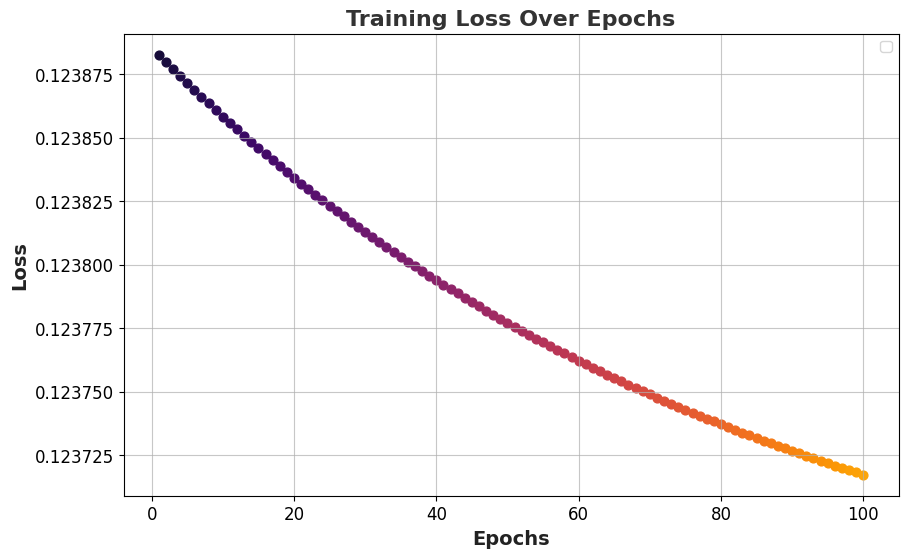

In [139]:
plt.figure(figsize=(10, 6))

# Generate gradient effect from Inferno (Deep Purple → Orange → Yellow)
num_points = len(training_error)
colors = cm.inferno(np.linspace(0.1, 0.8, num_points))  # Using the rich colors of Inferno

# Apply gradient effect to markers
for i in range(num_points):
    plt.scatter(i + 1, training_error[i], color=colors[i], s=40)

# Customize aesthetics
plt.grid(True, alpha = 0.7)  # Light dashed grid
plt.xlabel("Epochs", fontsize=14, fontweight='bold', color='#222')  
plt.ylabel("Loss", fontsize=14, fontweight='bold', color='#222')
plt.title("Training Loss Over Epochs", fontsize=16, fontweight='bold', color='#333')


# Improve tick marks visibility
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)

# Add legend with a slightly transparent background
plt.legend()  

# Show the plot
plt.show()

In [140]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
abalone = pd.read_csv(url, header=None)
column_names =['Sex', 'Length', 'Diameter', 'Height', 'Whole weight','Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone.columns = column_names
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [141]:
abalone = abalone.drop(columns='Sex')
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [142]:
X_train, X_test, y_train, y_test = train_test_split(abalone.drop(columns=['Rings']).values, abalone['Rings'].values, test_size=0.3, random_state=333)
print(f"Training set size: {X_train.shape}, {y_train.shape}")
print(f"Test set size: {X_test.shape}, {y_test.shape}")

Training set size: (2923, 7), (2923,)
Test set size: (1254, 7), (1254,)


In [143]:
# New abalone sample (from Table 1)
new_abalone = np.array([[0.569552, 0.446407, 0.154437, 1.016849, 0.439051, 0.222526, 0.291208]])  # Adjust for one-hot encoding

In [144]:
# Function to perform k-NN and predict the age
def knn_predict(X_train, y_train, X_test, k):
    predicted_ages = []
    for test_point in X_test:
        distances = np.linalg.norm(X_train - test_point, axis=1)
        nearest_indices = np.argsort(distances)[:k]
        nearest_ages = y_train[nearest_indices]
        predicted_age = st.mode(nearest_ages, keepdims=True)[0][0]
        predicted_ages.append(predicted_age)
    return np.array(predicted_ages)

In [145]:
# --- Step 1: k-NN Prediction for k=3 ---
k = 3

# Compute distances from new abalone sample
distances = np.linalg.norm(X_train - new_abalone, axis=1)

# Find indices of 3 nearest neighbors
nearest_indices = np.argsort(distances)[:k]

# Extract corresponding ages from y_train
nearest_ages = y_train[nearest_indices]

# Determine the most frequent age (mode)
predicted_age_k3 = st.mode(nearest_ages, keepdims=True)[0][0]

print(f"Predicted Age: {predicted_age_k3}")

Predicted Age: 11


In [146]:
k_values = range(1, 51)
mse_values = []

for k in k_values:
    predicted_ages_test = knn_predict(X_train, y_train, X_test, k)
    mse = np.mean((predicted_ages_test - y_test) ** 2)
    mse_values.append(mse)

# Find optimal k
optimal_k = k_values[np.argmin(mse_values)]
optimal_mse = min(mse_values)

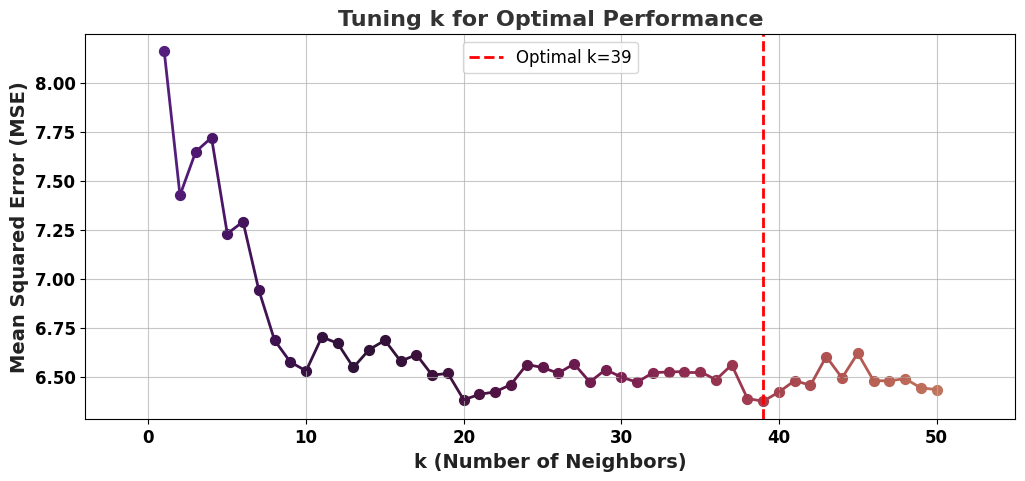

In [178]:
# Generate Twilight colormap
colors = cm.twilight(np.linspace(0.4, 0.8, len(k_values)))

plt.figure(figsize=(12, 5))  # Increase figure width for better spacing

# Scatter plot with Twilight gradient
for i, k in enumerate(k_values):
    plt.scatter(k, mse_values[i], color=colors[i], s=50)  # Each point with Twilight colormap

# Create segments for a gradient effect on the line
points = np.array([k_values, mse_values]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap='twilight', norm=plt.Normalize(0, 1))
lc.set_array(np.linspace(0.4, 0.8, len(k_values)))
lc.set_linewidth(2)

plt.gca().add_collection(lc)  # Add gradient line to plot

# Optimal k indicator
plt.axvline(optimal_k, color='r', linestyle='--', linewidth=2, label=f'Optimal k={optimal_k}')

# Increase spacing between x-axis intervals
plt.xticks(ticks=np.arange(min(k_values)-1, max(k_values)+1, 10))  # Set intervals (e.g., 0-10, 10-20, etc.)
plt.xlim(min(k_values) - 5, max(k_values) + 5)  # Stretch x-axis range for better spacing

# Customize aesthetics
plt.grid(True, alpha=0.7)
plt.xlabel('k (Number of Neighbors)', fontsize=14, fontweight='bold', color='#222')
plt.ylabel('Mean Squared Error (MSE)', fontsize=14, fontweight='bold', color='#222')
plt.title('Tuning k for Optimal Performance', fontsize=16, fontweight='bold', color='#333')

# Improve tick marks visibility
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Add legend
plt.legend(fontsize=12, frameon=True, loc="upper center")

# Show the plot
plt.show()

In [147]:
# Output results
print(f"Optimal k: {optimal_k}")
print(f"Minimum MSE: {optimal_mse}")

Optimal k: 39
Minimum MSE: 6.3740031897926634
